<a href="https://colab.research.google.com/github/OmerSherer/DS_EmpowerView/blob/main/ds_report/report_maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report Maker for Empowerview project 

Load fake data from mediapipe

In [1]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!gdown 1A9vYFy2cf_6bNJ6bZlOrGU9ME6jCoxYI

Downloading...
From: https://drive.google.com/uc?id=1A9vYFy2cf_6bNJ6bZlOrGU9ME6jCoxYI
To: /content/happyvideo1ts.csv
100% 62.1M/62.1M [00:01<00:00, 59.0MB/s]


### Creating a timeline

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the output of the gesture recognition neural network
# You can replace this with your own code to load the output
gestures_data = pd.read_csv('/content/happyvideo1ts.csv')



In [8]:
# Extract the relevant features
# You can replace these with your own features
timestamps = gestures_data['timestamp']


In [9]:
gesture_types = gestures_data['class']



In [ ]:
for i in range(len(timestamps)):
  print(timestamps[i])
  print(gesture_types[i])

In [15]:
import datetime

# Convert each timestamp to a datetime object
datetimes = [datetime.datetime.fromtimestamp(t) for t in timestamps]

# Calculate the time delta between the first timestamp and each subsequent timestamp
deltas = [(d - datetimes[0]).total_seconds() for d in datetimes]

# Convert the time deltas to a zero-indexed list of seconds
seconds = [int(delta) for delta in deltas]

print(seconds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15

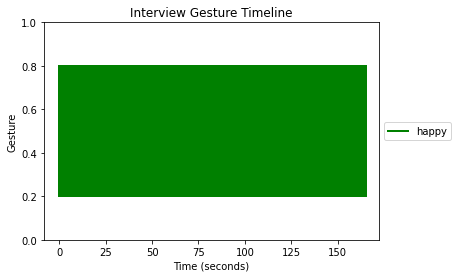

In [21]:
# Define a color palette for the gestures
colors = {'Smile': 'blue', 'happy': 'green', 'Handshake': 'red', 'Eye contact': 'purple', 'Lean forward': 'orange'}

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the gestures as vertical lines at their corresponding timestamps
lines = {}
for i in range(len(seconds)):
    gesture_type = gesture_types[i]
    color = colors[gesture_type]
    if gesture_type not in lines:
        lines[gesture_type] = ax.axvline(x=seconds[i], ymin=0.2, ymax=0.8, linewidth=2, color=color, label=gesture_type)
    else:
        ax.axvline(x=seconds[i], ymin=0.2, ymax=0.8, linewidth=2, color=color)

# Set the plot title and axis labels
ax.set_title('Interview Gesture Timeline')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Gesture')

# Create a legend with the gesture types
ax.legend(lines.values(), lines.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

### Analayze timeline data using XGBoost

In [12]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the timeline data
# You can replace this with your own code to load the timeline
timeline_data = pd.read_csv('/content/happyvideo1ts.csv')

# Extract the relevant features and target variable
# You can replace these with your own features
# X = timeline_data[['duration', 'amplitude']]
X = timeline_data['timestamp']
# y = timeline_data['gesture_type']
y = timeline_data['class']

# Split the data into training and testing sets
# You can adjust the test_size parameter to change the split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
params = {
    'objective': 'multi:softmax',
    'num_class': len(y.unique())
}
model = xgb.XGBClassifier(params=params)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


ValueError: ignored